# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Siti Nurhaliza
- **Email:** sitiliza4776@gmail.com
- **ID Dicoding:** lizasizas

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apa jenis produk yang memiliki penjualan tertinggi dan terendah?
- Pertanyaan 2: Apa jenis produk yang memiliki rata-rata score tertinggi?
- Pertanyaan 3: Bagaimana pendapatan terbesar dan terkecil berdasarkan kota penjual?

## Import Semua Packages/Library yang Digunakan

In [881]:
# untuk menghubungkan drive dan google colab
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [882]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [883]:
customers_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project dicoding/data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [884]:
geolocation_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project dicoding/data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [885]:
order_items_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project dicoding/data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [886]:
order_payments_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project dicoding/data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [887]:
order_reviews_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project dicoding/data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [888]:
orders_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project dicoding/data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [889]:
product_category_name_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project dicoding/data/product_category_name_translation.csv")
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [890]:
products_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project dicoding/data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [891]:
sellers_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project dicoding/data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Menilai tabel `customers_df`

In [892]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [893]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [894]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [895]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel `geolocation_df`

In [896]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [897]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [898]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [899]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [900]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [901]:
order_items_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [902]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [903]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [904]:
order_items_df["total_price"] = (order_items_df["price"] * order_items_df["order_item_id"]) + order_items_df["freight_value"]

In [905]:
order_items_df.describe()

,order_item_id,price,freight_value,total_price
count,112650.000000,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320,156.676859
std,0.705124,183.633928,15.806405,223.828970
min,1.000000,0.850000,0.000000,6.080000
25%,1.000000,39.900000,13.080000,59.870000
50%,1.000000,74.990000,16.260000,101.610000
75%,1.000000,134.900000,21.150000,172.300000
max,21.000000,6735.000000,409.680000,13468.010000


#### Menilai tabel `order_payments_df`

In [906]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [907]:
order_payments_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [908]:
print("Jumlah duplikasi: ",order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai tabel `order_reviews_df`

In [909]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [910]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [911]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [912]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai tabel `orders_df`

In [913]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [914]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [915]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai tabel `product_category_name_df`

In [916]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [917]:
print("Jumlah duplikasi: ", product_category_name_df.duplicated().sum())
product_category_name_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menilai tabel `products_df`

In [918]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [919]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai tabel `sellers_df`

In [920]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [921]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

#### Membersihkan tabel `geolocation_df`

##### Duplicate data

In [922]:
geolocation_df.duplicated().sum()

261831

In [923]:
geolocation_df.drop_duplicates(inplace=True)

In [924]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


#### Membersihkan tabel `order_reviews_df`

##### Missing values

In [925]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [926]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [927]:
order_reviews_cleaned_df = order_reviews_df.dropna()

In [928]:
order_reviews_cleaned_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Membersihkan tabel `orders_df`

In [929]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [930]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [931]:
orders_cleaned_df = orders_df.dropna()

In [932]:
orders_cleaned_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

##### Memperbaiki tipe data

In [933]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
  orders_cleaned_df[column] = pd.to_datetime(orders_cleaned_df[column])

In [934]:
orders_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [935]:
orders_cleaned_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


#### Membersihkan tabel `products_df`

##### missing value

In [936]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [937]:
products_cleaned_df = products_df.dropna()

In [938]:
products_cleaned_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [939]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
28032,c8fe64c888322ebadbf08b8ccd34c309,7ad21c710fb124becb6b9f5ea2cb82f6,49910,telha,SE
30843,819478282706b05fe0491ca57f315e3d,6c1c252f9b69c9bef97afb679650e62a,4310,sao paulo,SP
38258,6de64ef326df82caf572b9f9b164eb48,6acf8b25ffba002d0a01a06db2066efa,49890,nossa senhora de lourdes,SE
31499,7e9a33809ef317ec0fb58c5a74a5ed84,1c96f36eb76496a19d36fd2b8f45c3cd,15940,fernando prestes,SP
79323,ac5464f145e02f0f756666b3e8792cf7,f39c6ebf797e244ae9c657b895888974,19200,pirapozinho,SP


In [940]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [941]:
customers_df.customer_id.is_unique

True

In [942]:
customers_df.customer_id.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99436    False
99437    False
99438    False
99439    False
99440    False
Name: customer_id, Length: 99441, dtype: bool

In [943]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [944]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore `geolocation_df`

In [945]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
390810,18550,-23.311341,-47.683729,boituva,SP
49236,3239,-23.594579,-46.545360,são paulo,SP
208124,8502,-23.538326,-46.355266,ferraz de vasconcelos,SP
464231,23575,-22.920401,-43.657541,rio de janeiro,RJ
9221,1324,-23.557853,-46.642771,sao paulo,SP


In [946]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [947]:
geolocation_df.geolocation_zip_code_prefix.is_unique

False

In [948]:
geolocation_df.geolocation_zip_code_prefix.duplicated()

0          False
1          False
2           True
3          False
4          False
           ...  
1000155     True
1000156     True
1000157     True
1000158     True
1000161     True
Name: geolocation_zip_code_prefix, Length: 738332, dtype: bool

In [949]:
geolocation_df.groupby(by="geolocation_city").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

geolocation_city
sao paulo               3171
são paulo               3013
brasilia                 496
brasília                 406
rio de janeiro           404
                        ... 
guarei                     1
guardinha                  1
guarda-mor                 1
guarda dos ferreiros       1
óleo                       1
Name: geolocation_zip_code_prefix, Length: 8011, dtype: int64

In [950]:
geolocation_df.groupby(by="geolocation_state").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

geolocation_state
SP    6349
MG    1868
RJ    1390
RS    1132
PR    1046
BA     992
GO     773
SC     620
PE     596
CE     548
DF     516
PB     324
ES     315
MA     313
PA     309
PI     307
RN     280
MT     254
MS     242
TO     184
AL     178
AM     144
SE     135
RO     108
AC      46
RR      28
AP      26
Name: geolocation_zip_code_prefix, dtype: int64

### Explore `customers_df` & `geolocation_df`

#### Menggabungkan data `customers_df` & `geolocation_df`

In [951]:
customers_geolocation_df = pd.merge(
    left=customers_df,
    right=geolocation_df[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
    how="left",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
customers_geolocation_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.509897,-47.397866
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.497396,-47.399241
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.510459,-47.399553
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.480940,-47.394161
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.515413,-47.398194


In [952]:
customers_geolocation_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_id, dtype: int64

In [953]:
customers_geolocation_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: customer_id, dtype: int64

### Explore `sellers_df`

In [954]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2084,6973a06f484aacf400ece213dbf3d946,12230,sao jose dos campos,SP
2199,cb810bd318f51b3dc3c753944d61a1fa,24240,niteroi,RJ
465,dc64d75cc406bb0697be983831430e60,31560,belo horizonte,MG
1782,5659d77e8d90378e39b960ad5956f64e,12062,taubate,SP
274,1099a00e0ee3a50935e6c2447ca090c5,20921,rio de janeiro,RJ


In [955]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [956]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [957]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

### Explore `sellers_df` & `geolocation_df`

#### Menggabungkan data `sellers_df` dan `geolocation_df`

In [958]:
sellers_geolocation_df = pd.merge(
    left=sellers_df,
    right=geolocation_df[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
    how="left",
    left_on="seller_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
sellers_geolocation_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023.0,-22.898536,-47.063125
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023.0,-22.895499,-47.061944
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023.0,-22.891740,-47.060820
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023.0,-22.895762,-47.066144
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023.0,-22.896154,-47.062431


In [959]:
sellers_geolocation_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64

#### Menggabungkan data `products_df` & `product_category_name_df`

In [960]:
all_products_df = pd.merge(
    left=products_cleaned_df,
    right=product_category_name_df,
    how="left",
    on="product_category_name"
)
all_products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


### Explore All data

#### Menggabungkan all data

In [961]:
all_df = pd.merge(orders_cleaned_df, customers_df, on='customer_id', how='inner')
all_df = all_df.merge(order_items_df, on='order_id', how='inner')
all_df = all_df.merge(sellers_df, on='seller_id', how='inner')
all_df = all_df.merge(all_products_df, on='product_id', how='inner')
all_df = all_df.merge(order_payments_df, on='order_id', how='inner')
all_df = all_df.merge(order_reviews_cleaned_df, on='order_id', how='inner')

In [962]:
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22,8b8028d453a01986b48c4271cc341475,14500,...,1,credit_card,5,135.82,ebd3c6f3c54ee7cbdecefd57d5d57d1e,5,super recomendo,estou satisfeito,2018-08-15 00:00:00,2018-08-18 16:12:50
2,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18,3edcab192482e9871c17b34cf98c3996,33820,...,1,boleto,1,128.04,7a48dff7ae9e5a6d9187517daa9d9908,5,Muito bom,"Gostei bastante mas,a fragrância e mais fraca",2018-07-13 00:00:00,2018-07-17 16:31:39
3,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10,958ac7760e5484df1496ba5833ab6117,89117,...,1,credit_card,2,279.30,8892abc02a527ef7535564ecfc0d0133,5,super recomendo,"entrega no prazo, amei",2018-08-29 00:00:00,2018-09-11 12:15:59
4,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10,958ac7760e5484df1496ba5833ab6117,89117,...,1,credit_card,2,279.30,8892abc02a527ef7535564ecfc0d0133,5,super recomendo,"entrega no prazo, amei",2018-08-29 00:00:00,2018-09-11 12:15:59


In [963]:
all_df.groupby(by=["seller_state", "product_category_name_english"]).agg({
    "order_item_id": "sum",
    "total_price": "sum"
})

order_item_id  total_price
seller_state product_category_name_english                            
BA           baby                                       1       223.44
             computers                                  4      7251.15
             computers_accessories                     13     13044.17
             drinks                                     1       161.37
             electronics                                1       134.32
...                                                   ...          ...
SP           stationery                               161     17162.07
             tablets_printing_image                     1        58.19
             telephony                                485     34656.55
             toys                                     181     23972.74
             watches_gifts                            823    159935.78

[316 rows x 2 columns]

In [964]:
all_df.groupby(by="seller_state").agg({
    "order_id": "nunique",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

,order_id,total_price
seller_state,,
SP,6813,1324917.98
PR,685,167474.23
MG,647,126391.38
RJ,477,123410.10
SC,310,80372.28
RS,177,58823.97
BA,56,38347.95
PE,69,37327.66
MA,139,17824.27


In [965]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa jenis produk yang memiliki penjualan tertinggi dan terendah?

In [966]:
sum_order_items_df = all_df.groupby("product_category_name_english").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(10)

,product_category_name_english,order_item_id
0,bed_bath_table,1572
1,housewares,1412
2,health_beauty,1302
3,furniture_decor,1031
4,watches_gifts,1027
5,sports_leisure,856
6,computers_accessories,839
7,auto,614
8,telephony,561
9,garden_tools,513


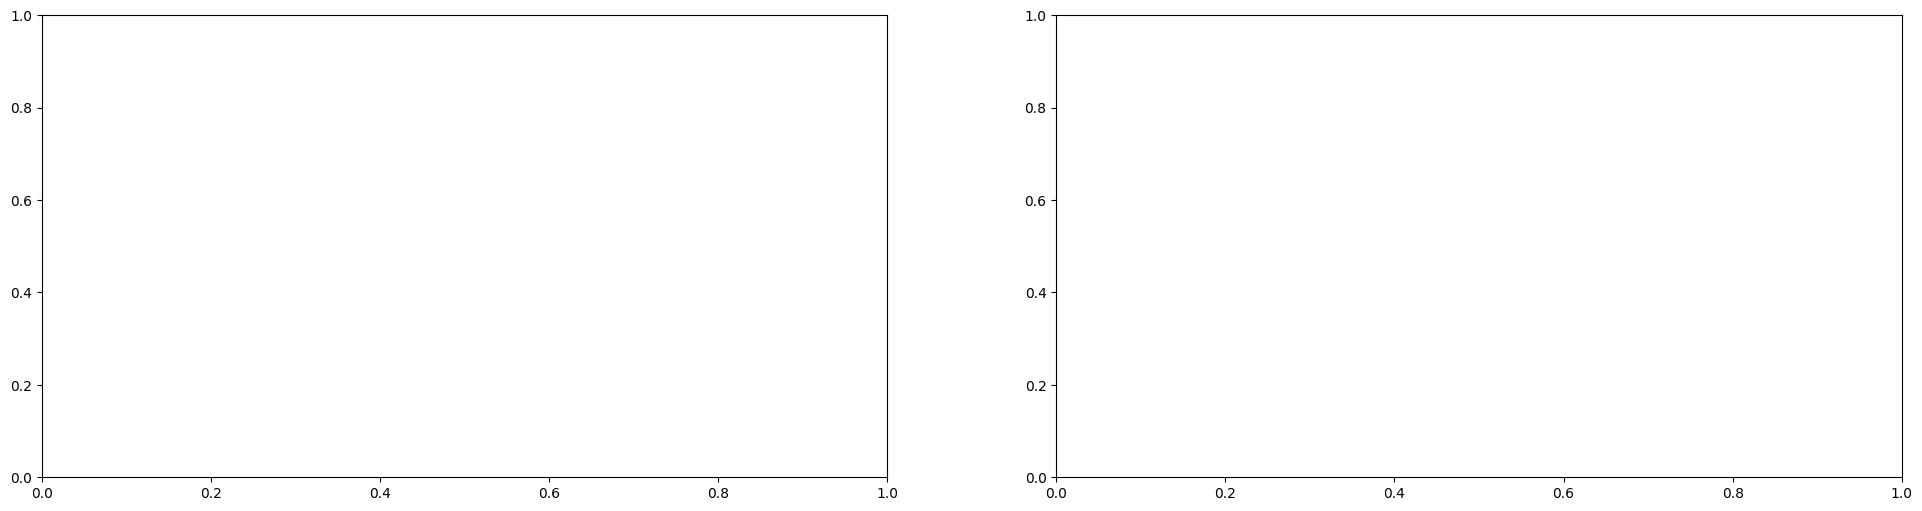

In [967]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

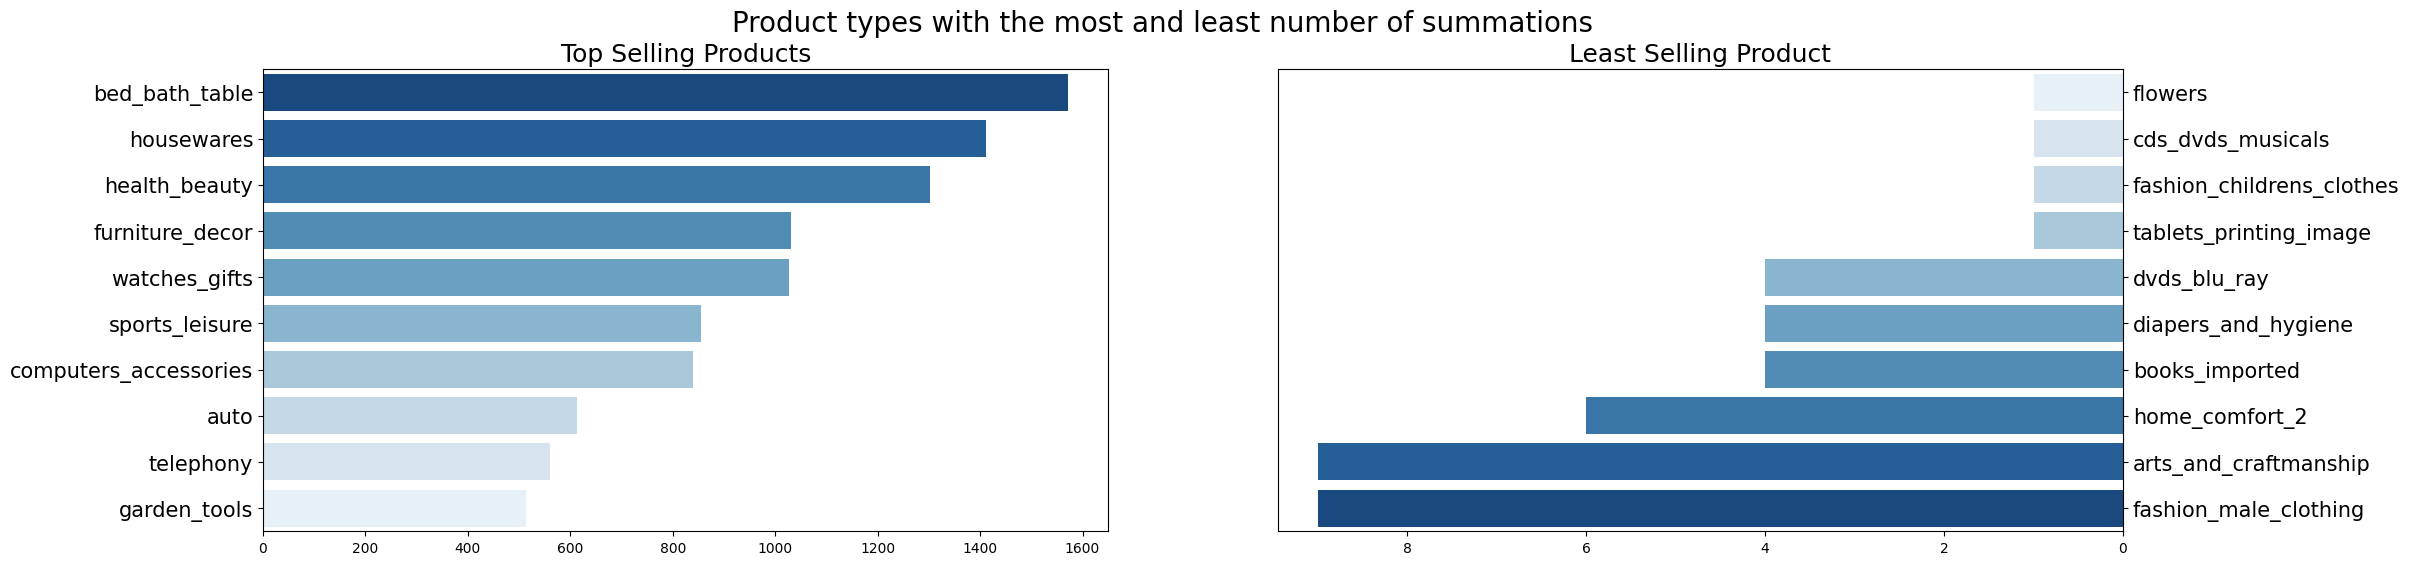

In [968]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

custom_palette = sns.color_palette("Blues", n_colors=10)[::-1]

sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.head(10), palette=custom_palette, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top Selling Products", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(10), palette="Blues", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Least Selling Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Product types with the most and least number of summations", fontsize=20)
plt.show()

In [969]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11586 entries, 0 to 11585
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       11586 non-null  object        
 1   customer_id                    11586 non-null  object        
 2   order_status                   11586 non-null  object        
 3   order_purchase_timestamp       11586 non-null  datetime64[ns]
 4   order_approved_at              11586 non-null  datetime64[ns]
 5   order_delivered_carrier_date   11586 non-null  datetime64[ns]
 6   order_delivered_customer_date  11586 non-null  datetime64[ns]
 7   order_estimated_delivery_date  11586 non-null  datetime64[ns]
 8   customer_unique_id             11586 non-null  object        
 9   customer_zip_code_prefix       11586 non-null  int64         
 10  customer_city                  11586 non-null  object        
 11  customer_state 

### Pertanyaan 2: Apa jenis produk yang memiliki rata-rata score tertinggi?

In [970]:
rate_product_df = all_df.groupby("product_category_name_english")['review_score'].agg('mean').sort_values(ascending=False).reset_index()
rate_product_df.head(10)

,product_category_name_english,review_score
0,fashion_childrens_clothes,5.000000
1,tablets_printing_image,5.000000
2,cds_dvds_musicals,5.000000
3,fashion_shoes,4.750000
4,fashion_male_clothing,4.750000
5,fashion_underwear_beach,4.571429
6,christmas_supplies,4.533333
7,costruction_tools_tools,4.428571
8,stationery,4.277512
9,small_appliances_home_oven_and_coffee,4.266667


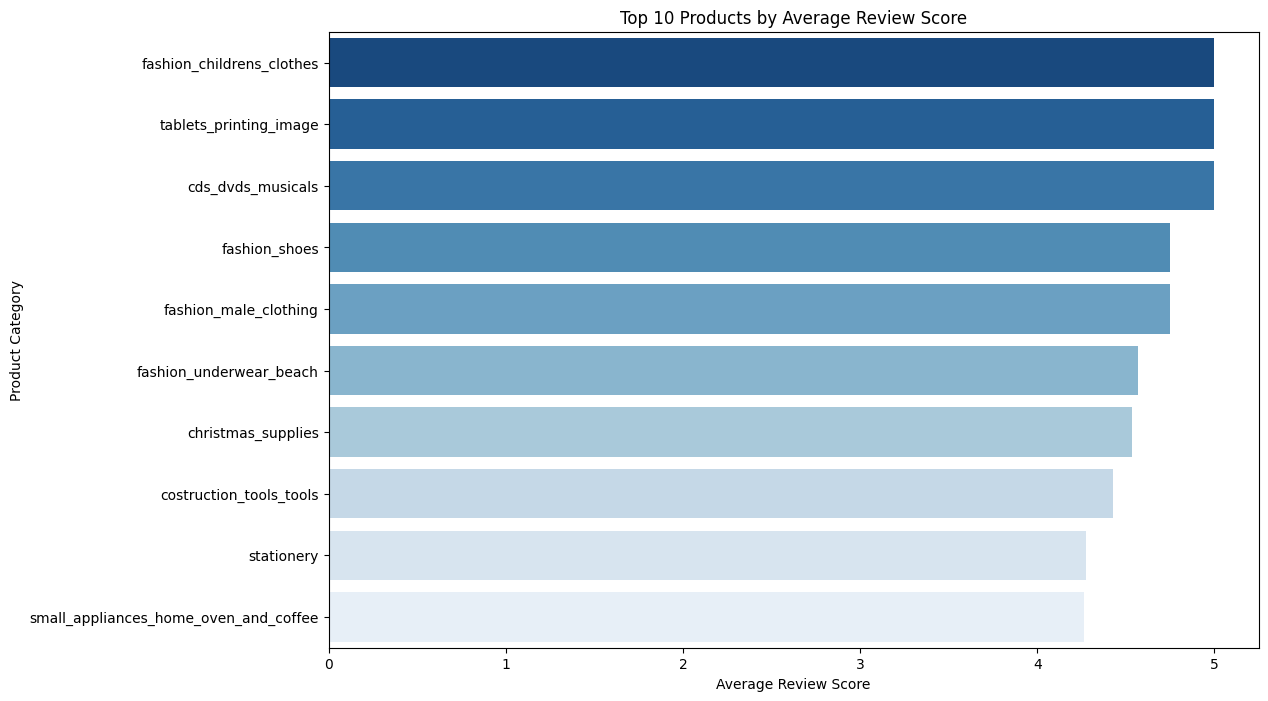

In [971]:
top_10_products = rate_product_df.head(10)

# Membuat plot
plt.figure(figsize=(12, 8))
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
custom_palette = sns.color_palette("Blues", n_colors=10)[::-1]
sns.barplot(x="review_score", y="product_category_name_english", data=top_10_products, palette=custom_palette)

# Menambahkan label dan judul
plt.xlabel("Average Review Score")
plt.ylabel("Product Category")
plt.title("Top 10 Products by Average Review Score")

# Menampilkan plot
plt.show()

### Pertanyaan 3: Bagaimana pendapatan terbesar dan terkecil berdasarkan kota penjual?

In [972]:
seller_df = all_df.groupby("seller_city").total_price.sum().sort_values(ascending=False).reset_index()
seller_df.head(10)

,seller_city,total_price
0,sao paulo,419153.39
1,ibitinga,87354.69
2,guarulhos,79698.88
3,itaquaquecetuba,53853.64
4,curitiba,53795.33
5,rio de janeiro,49397.64
6,ribeirao preto,47851.99
7,campinas,41264.06
8,sao bernardo do campo,38187.23
9,recife,37216.08


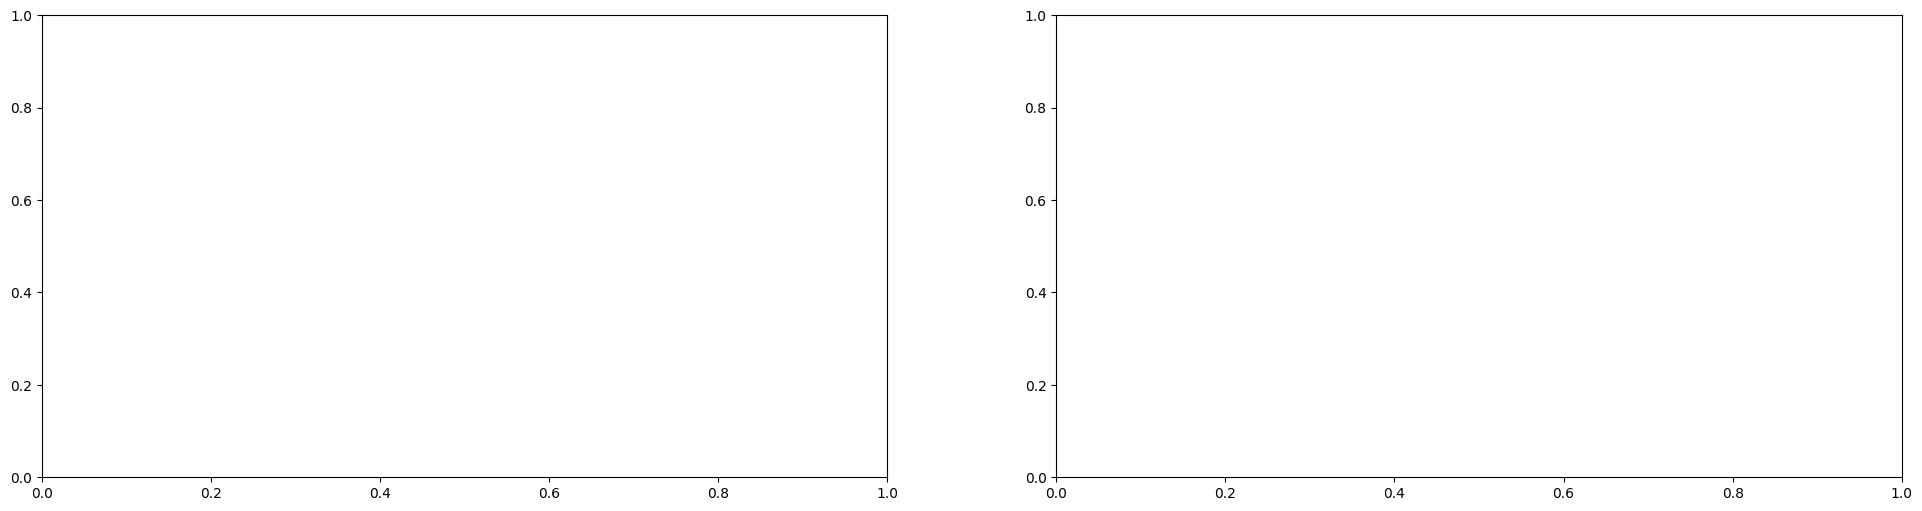

In [973]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

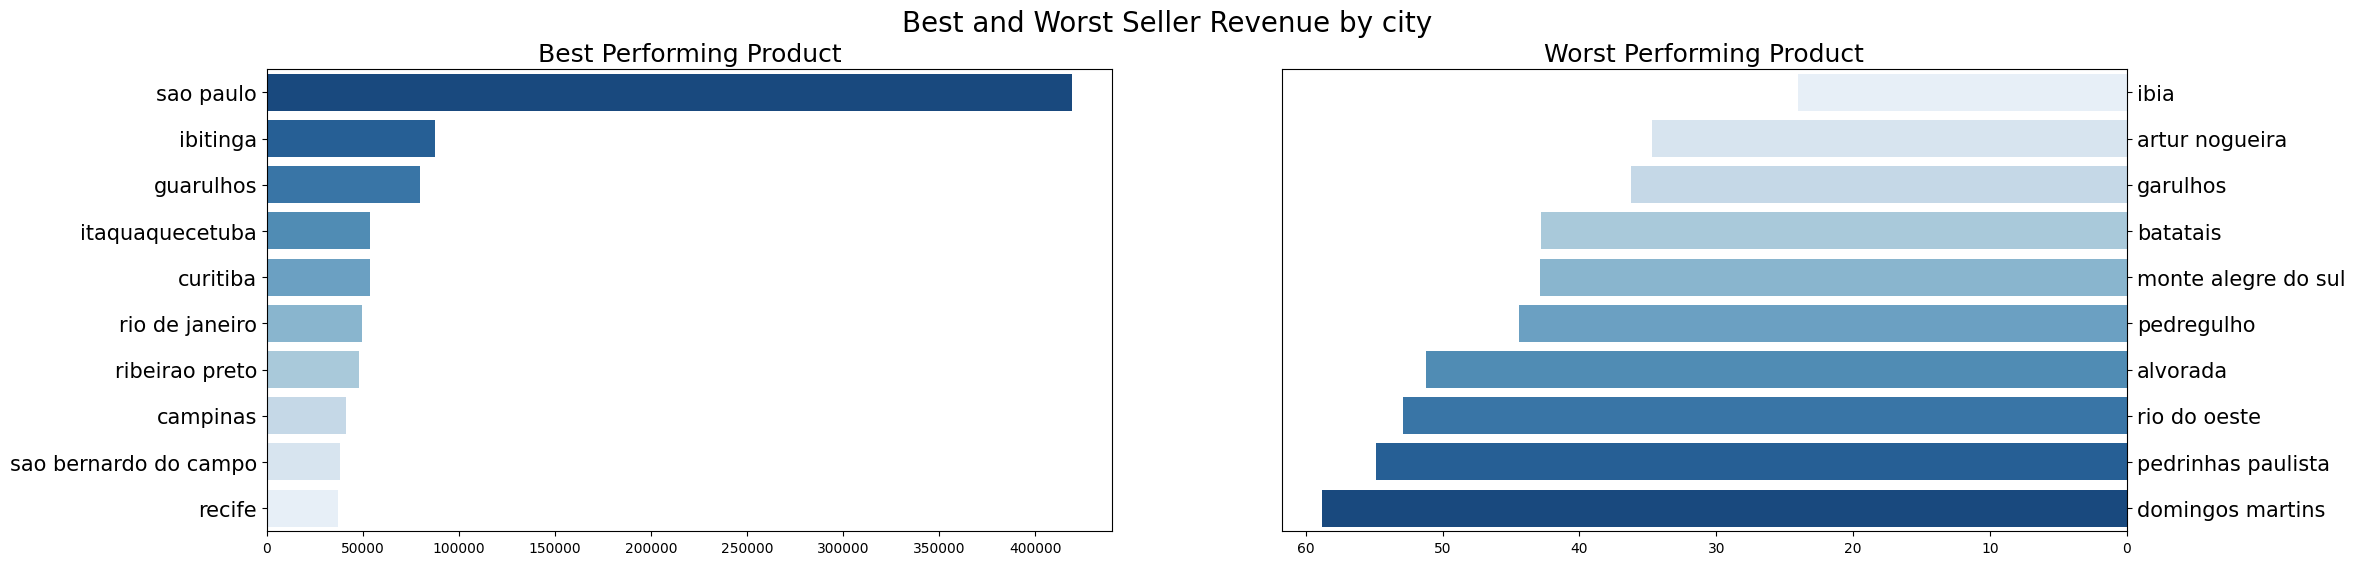

In [974]:
custom_palette = sns.color_palette("Blues", n_colors=10)[::-1]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="total_price", y="seller_city", data=seller_df.head(10), palette=custom_palette, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="total_price", y="seller_city", data=seller_df.sort_values(by="total_price", ascending=True).head(10), palette="Blues", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Seller Revenue by city", fontsize=20)
plt.show()

### RFM Analysis

In [975]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "total_price": "sum"
})
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_unique_id,max_order_timestamp,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,141.90
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26,1,27.75
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49,1,122.07
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,1,191.80
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,1,197.27


In [976]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"])

recent_date = orders_cleaned_df["order_purchase_timestamp"].max().date()
rfm_df["recency"] = (recent_date - rfm_df["max_order_timestamp"].dt.date).dt.days

rfm_df.head()

,customer_unique_id,max_order_timestamp,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,141.90,111
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26,1,27.75,8
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49,1,122.07,32
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,1,191.80,5
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,1,197.27,120


In [977]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,111
1,000ec5bff359e1c0ad76a81a45cb598f,1,27.75,8
2,00172711b30d52eea8b313a7f2cced02,1,122.07,32
3,001928b561575b2821c92254a2327d06,1,191.80,5
4,0019e8c501c85848ac0966d45226fa1d,1,197.27,120


In [978]:
rfm_df.describe()

,frequency,monetary,recency
count,9340.000000,9340.000000,9340.000000
mean,1.011028,215.887161,73.397645
std,0.108462,431.936245,42.538579
min,1.000000,13.890000,0.000000
25%,1.000000,68.430000,35.000000
50%,1.000000,122.130000,73.000000
75%,1.000000,209.700000,111.000000
max,3.000000,18014.880000,482.000000


In [979]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_unique_id,frequency,monetary,recency
1256,21dbe8eabd00b34492a939c540e2b1a7,1,14.29,0
6640,b4dcade04bc548b7e3b0243c801f8c26,1,106.95,0
4720,7febafa06d9d8f232a900a2937f04338,1,61.29,0
9053,f80013faf776e37bcea7634d59c2181e,1,74.21,0
4496,7a22d14aa3c3599238509ddca4b93b01,1,73.10,0


In [980]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_unique_id,frequency,monetary,recency
5766,9c08d6f85c7fcec4b08ead25590c0af7,3,393.08,90
335,08e5b38d7948d37fbb2a59fc5e175ab1,3,701.43,111
3940,6a9e15d6fa8ce1cabf193c21aa577f64,3,425.51,24
7595,cfa69922f9968e0e6271647abda09b09,3,158.60,26
3930,6a6a7141119ceaeca4dfbae7a580a515,2,75.06,41


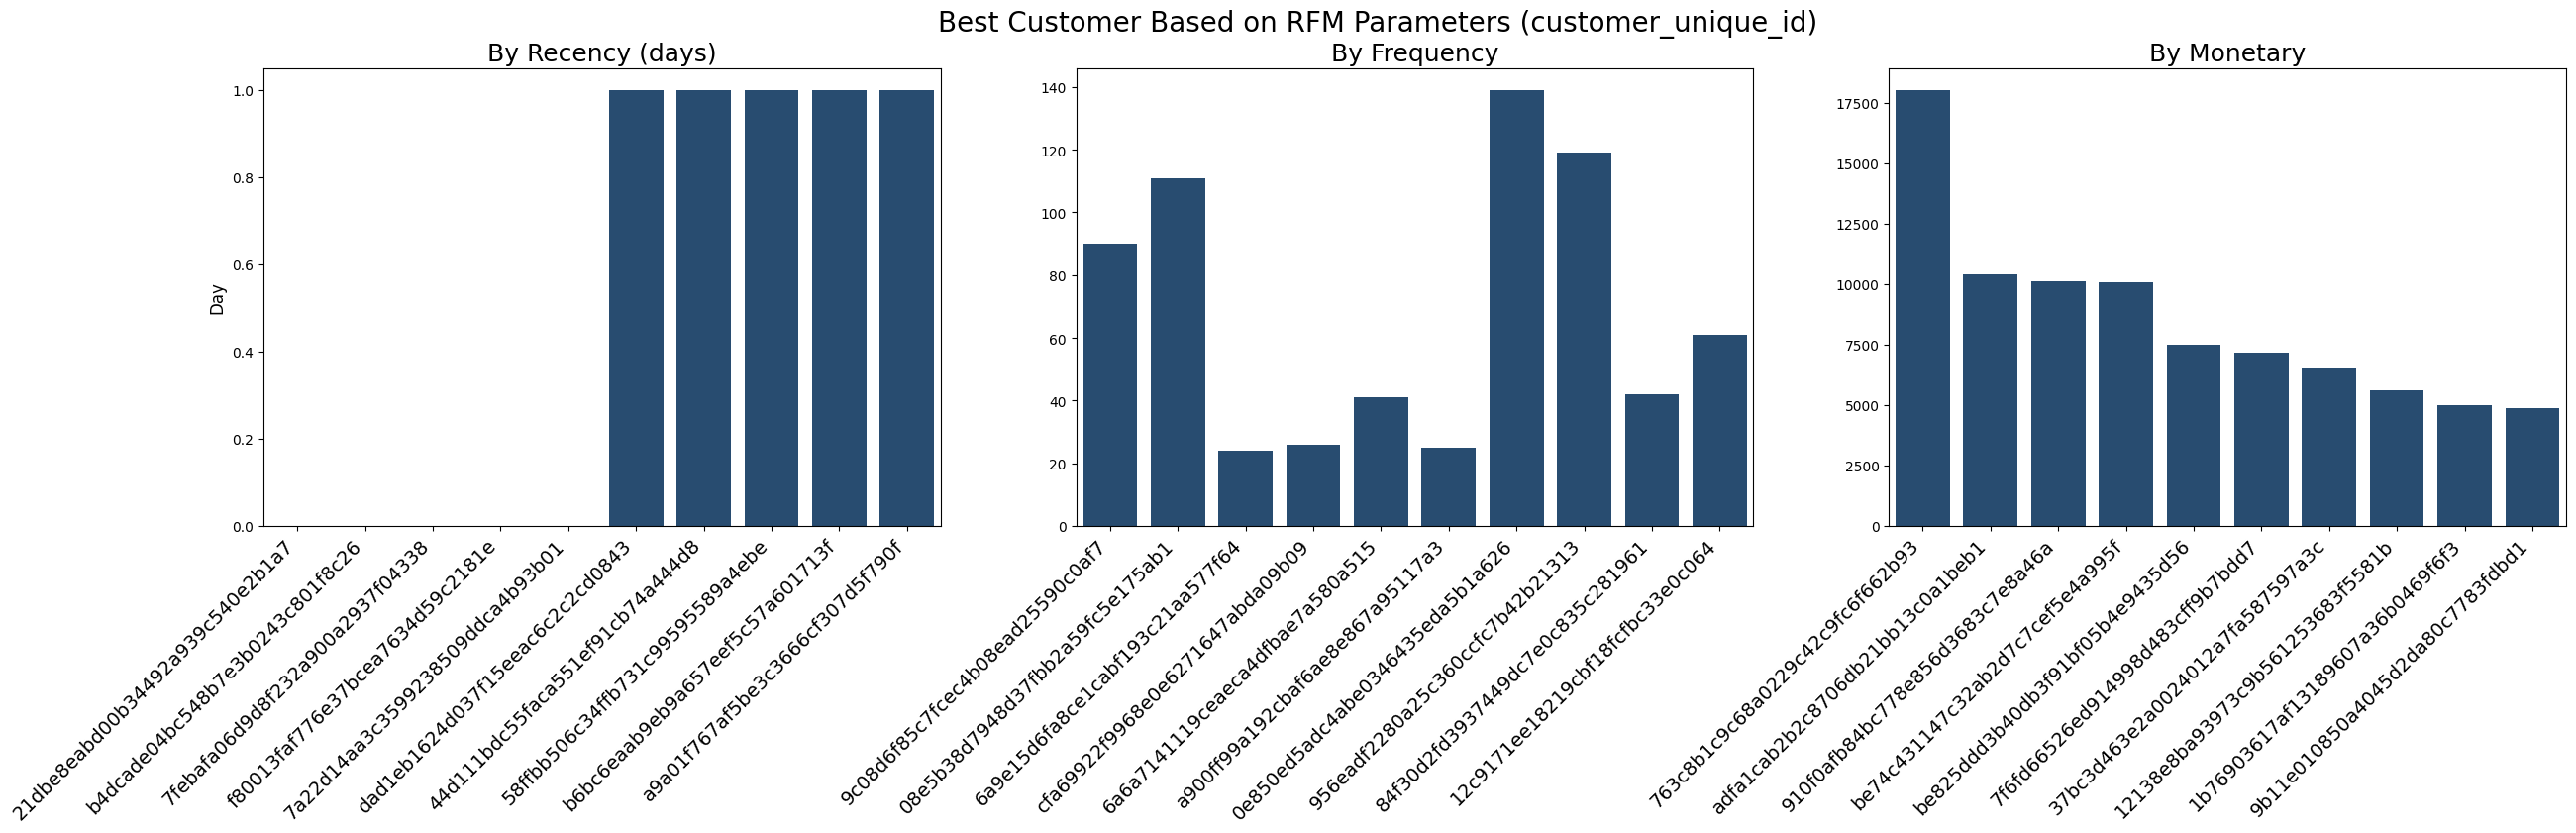

In [981]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#1C4C7C", "#1C4C7C", "#1C4C7C", "#1C4C7C", "#1C4C7C"]

sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel('Day', fontsize=12)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(10), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20)
plt.show()

#### Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [982]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)
rfm_df.head()

,customer_unique_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,111,2297.5,4621.0,5371.0
1,000ec5bff359e1c0ad76a81a45cb598f,1,27.75,8,9114.5,4621.0,223.0
2,00172711b30d52eea8b313a7f2cced02,1,122.07,32,7202.5,4621.0,4670.0
3,001928b561575b2821c92254a2327d06,1,191.80,5,9253.5,4621.0,6643.0
4,0019e8c501c85848ac0966d45226fa1d,1,197.27,120,1499.0,4621.0,6758.0


In [983]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_unique_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,111,24.603770,49.483322,57.505353
1,000ec5bff359e1c0ad76a81a45cb598f,1,27.75,8,97.606554,49.483322,2.387580
2,00172711b30d52eea8b313a7f2cced02,1,122.07,32,77.131077,49.483322,50.000000
3,001928b561575b2821c92254a2327d06,1,191.80,5,99.095095,49.483322,71.124197
4,0019e8c501c85848ac0966d45226fa1d,1,197.27,120,16.052688,49.483322,72.355460


In [984]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_unique_id', 'RFM_score']].head(7)

,customer_unique_id,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2.52
1,000ec5bff359e1c0ad76a81a45cb598f,1.49
2,00172711b30d52eea8b313a7f2cced02,2.70
3,001928b561575b2821c92254a2327d06,3.46
4,0019e8c501c85848ac0966d45226fa1d,2.88
5,002311514717ca8b65b09a26cdf7b91a,2.58
6,0025795df7a7d077c4c90162fa820085,3.67


#### Segmentasi customer berdasarkan RFM_score

In [985]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_unique_id', 'RFM_score', 'customer_segment']].head(20)

,customer_unique_id,RFM_score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,2.52,Low value customers
1,000ec5bff359e1c0ad76a81a45cb598f,1.49,lost customers
2,00172711b30d52eea8b313a7f2cced02,2.70,Low value customers
3,001928b561575b2821c92254a2327d06,3.46,Medium value customer
4,0019e8c501c85848ac0966d45226fa1d,2.88,Low value customers
5,002311514717ca8b65b09a26cdf7b91a,2.58,Low value customers
6,0025795df7a7d077c4c90162fa820085,3.67,Medium value customer
7,0034c76b7e6a17d738375b99afc2f01e,1.16,lost customers
8,0035029989e6fc5cf030918a5f9f2037,3.62,Medium value customer
9,003c2067070f5b3d923235b1ea1cc17b,3.02,Medium value customer


In [986]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_unique_id.nunique()
customer_segment_df

,customer_segment,customer_unique_id
0,High value customer,193
1,Low value customers,4637
2,Medium value customer,2754
3,Top customers,20
4,lost customers,1736


In [987]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

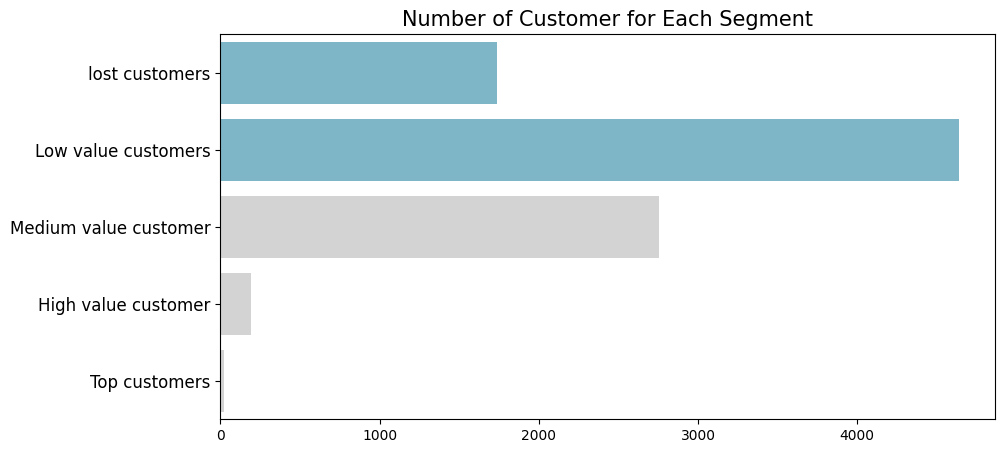

In [988]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_unique_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1: Jenis produk dengan penjualan tertinggi diperoleh oleh produk bed_bath_table dengan total produk terjual sebanyak 1572 produk. Kemudian, jenis produk dengan penjualan terendah, yaitu berasal dari produk flower, cds_dvds_musicals, and fashion_childrens_clothes sebanyak 1 produk yang terjual

- Conclution pertanyaan 2: Jenis produk yang memiliki rata-rata review score tertinggi diperoleh oleh produk fashion_childrens_clothes, tablets_printing_image, cds_dvds_musicals dengan perolehan rating 5/5

- Conclution pertanyaan 3: Total pendapatan terbanyak berdasarkan kota seller diperoleh oleh kota sao paulo dengan pendapatan sebesar 419153.39, sedangkan total pendapatan terendah diperoleh oleh kota ibia sebesar 24.0